# Код Шеннона-Фано


In [4]:
BIG_FILE = 'big_file.txt'
MIDDLE_FILE = 'file.txt'
SMALL_FILE = 'small_file.txt'

curr_file = BIG_FILE

with open(curr_file, encoding='utf-8', mode='r') as file:
    text = file.read()

text

'Newsgroups: alt.angst.xibo.sex,alt.mud,alt.religion.kibo\nFrom: jfurr@nyx.cs.du.edu (JKF)\nSubject: Xibo\'s Vacation (LONG) [Repost]\nMessage-ID: <1992Dec20.032721.23591@mnemosyne.cs.du.edu>\nKeywords: mud angst xibo tank girl\nReply-To: xibo@fido.econ.arizona.edu\nOrganization: Nyx, Public Access Unix @ U. of Denver Math/CS dept.\nDate: Sun, 20 Dec 92 03:27:21 GMT\nLines: 1380\n\n\nYes, Xibo knows I\'m posting this.  Send comments about the writing to Xibo\nat xibo@fido.econ.arizona.edu.\n\nBy: xibo@fido.econ.arizona.edu (Mr. Coates)\nDate: 9 Apr 92 18:41:49 GMT\nOrganization: Xibological Perimeter\n\n\nSeveral months ago, a few angst-list members were mulling over the idea of\nAngstCon III, where to have it, and when.  It became quickly apparent that if\nwe held it in Minneapolis, then the turnout would be pretty good, since five\nof the members live in that area.  So a few arrangements were made, the date\ndebated wildly, and eventually the weekend of March 27th was decided upon.\n

D:\GitHub\encoding_algorithms\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


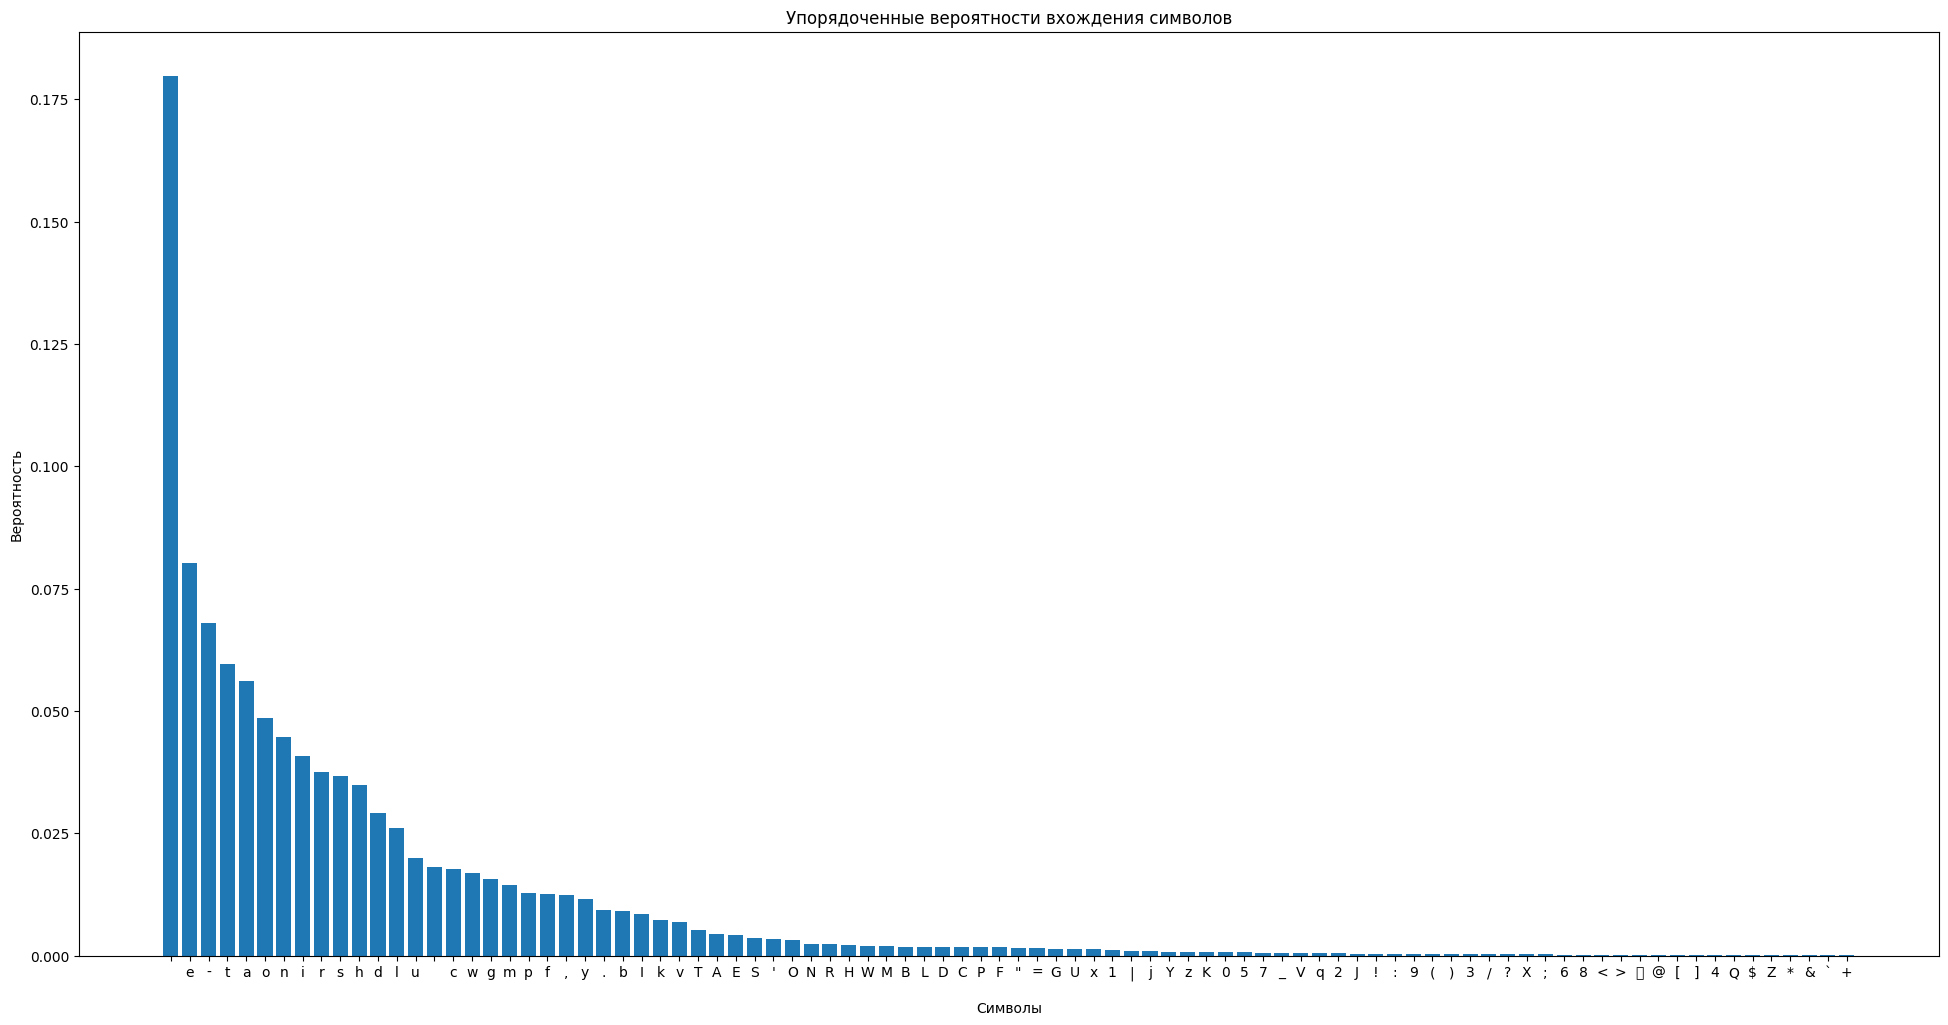

In [5]:
import matplotlib.pyplot as plt

from collections import Counter, OrderedDict

sym_counter = Counter(text)
sc_len = sum(sym_counter.values())
symd = {
    letter: count / sc_len
    for letter, count in sym_counter.items()
}

alphabet_probas = OrderedDict(sorted(
    symd.items(),
    key=lambda kv: kv[1],
    reverse=True,
))

plt.figure(figsize=(24, 12))
plt.bar(alphabet_probas.keys(), alphabet_probas.values())
plt.xlabel('Символы')
plt.ylabel('Вероятность')
plt.title('Упорядоченные вероятности вхождения символов')
plt.show()

In [6]:
letter_list = list(alphabet_probas.keys())
letter_probas = list(alphabet_probas.values())

In [7]:
def best_partition(initial, final):
    # Points.
    pts = []
    for i in range(initial + 1, final):
        diff = abs(sum(letter_probas[initial:i]) - sum(letter_probas[i:final]))
        pts.append(diff)

    print(pts.index(min(pts)) + initial)
    if pts.index(min(pts)) < initial:
        return pts.index(min(pts)) + initial

    return pts.index(min(pts))


def up(initial, final):
    for i in range(initial, final):
        sym_counter[i] = sym_counter[i] + '0'


def down(initial, final):
    for i in range(initial, final):
        sym_counter[i] = sym_counter[i] + '1'

In [8]:
initial = 0
final = len(letter_probas)
sym_counter = [''] * (len(letter_probas))
current_index = [(initial, final)]
new_index = []
stage = 1
while current_index:
    print(f'Stage: {stage}')
    print(sym_counter)
    new_index = []
    for index in current_index:
        if index[1] - index[0] == 2:
            sym_counter[index[0]] = sym_counter[index[0]] + '0'
            sym_counter[index[1] - 1] = sym_counter[index[1] - 1] + '1'

        if index[1] - index[0] > 2:
            index_ptr = best_partition(index[0], index[1]) + 1
            new_index.append((index[0], index_ptr))
            up(index[0], index_ptr)
            new_index.append((index_ptr, index[1]))
            down(index_ptr, index[1])
        current_index = new_index
    print()
    stage += 1

# for last stage
if not current_index:
    print(f'Stage: {stage}')
    print(sym_counter)
    new_index = []

Stage: 1
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
5

Stage: 2
['0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
1
12

Stage: 3
['00', '00', '01', '01', '01', '01', '10', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '

In [9]:
import pandas as pd

pd.DataFrame({
    'Символ': letter_list,
    'Вероятность': letter_probas,
    'Кодовое слово': sym_counter,
})

,Символ,Вероятность,Кодовое слово
0,,0.179836,000
1,e,0.080173,001
2,-,0.067875,0100
3,t,0.059529,0101
4,a,0.056093,0110
...,...,...,...
85,Z,0.000066,111111111111110
86,*,0.000038,1111111111111110
87,&,0.000009,11111111111111110
88,`,0.000009,111111111111111110


## Кодирование текста

In [10]:
coder = {
    c: sym_counter[i]
    for i, c in enumerate(letter_list)
}

encoded_message = ''.join(
    coder[c]
    for c in text
)
print(f'Закодированное сообщение:\n{encoded_message}')

Закодированное сообщение:
11111010100011110011110011111010011001001111101111110110110011111111111001000001101101100101111100100110101110100110011010111110010111111100101100011110011011111110010110011001111111100101110111101101101100101111100101110101110111110101111011110110110110010111110010110010001110110110001110100110000111101111001011110101110001111001101111110001111110101110010011111101011111111110010000111111101011110111011011111001011001011111111111011101111000111111100101111001011100101100111111001011010111011111110010001110101110111000111111111010011111111011111111111011111111110101111111111010111100011111001011011111110011111111101010011110010010111111111100100001111111111001110001111001101111111100111100110001111111101010110111001001100101110000111100001111111110100111111000111111010011111010101111110111111111111101010001111111111110011111010110011110110011111001101011111111111110101110001111101111001110011110011011011101000010100111101001111110010111111111001000011111111111

## Эффективность сжатия

In [11]:
plain_len = len(''.join(format(ord(x), 'b') for x in text))
encoded_len = len(encoded_message)

print(f'Эффективность сжатия: {1 - (encoded_len / plain_len):.3f}')

Эффективность сжатия: 0.246
